# DSIR CODING CHALLENGE - RUSSELL BROWN

In [1]:
import pandas as pd
pd.options.display.max_rows = 10

data = pd.read_csv('bank-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Comment on any steps you might take to evaluate or transform the dataset

In [2]:
print data.info()
data.describe()

# No missing values in any columns
# range for age, balance, day, campaign, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
# split column names into numeric and categorical for visual inspection
all_cols = data.columns.values
num_cols = data.describe().columns.values
cat_cols = []
for key in all_cols:
    if key not in num_cols:
        cat_cols.append(key)

print 'NUMERIC COLUMNS:'
print num_cols
print 'CATEGORICAL COLUMNS:'
print cat_cols

NUMERIC COLUMNS:
['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
CATEGORICAL COLUMNS:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [4]:
for key in cat_cols:
    print data[key].value_counts()
    print
    
# There are no typos and there are no null values in any of these columns
# This data requires no cleaning

blue-collar     9732
management      9458
technician      7597
admin.          5171
services        4154
                ... 
entrepreneur    1487
unemployed      1303
housemaid       1240
student          938
unknown          288
Name: job, Length: 12, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
       ...  
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, Length: 12, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

no     39922
y

Compute the mean and median age among individuals who do subscribe a term deposit and among individuals who do not subscribe a term deposit. Do the mean and median differ among those who subscribe a term deposit? What about among those who do not subscribe a term deposit? Explain how you would identify this.

In [5]:
import numpy as np

age_yes = data['age'][data['y'] == 'yes']
mean_age_yes = np.mean(age_yes)
med_age_yes = np.median(age_yes)
print 'Mean Age of Subscribers: ' + str(mean_age_yes)
print 'Median Age of Subscribers: ' + str(med_age_yes)
print
age_no = data['age'][data['y'] == 'no']
mean_age_no = np.mean(age_no)
med_age_no = np.median(age_no)
print 'Mean Age of Non-Subscribers: ' + str(mean_age_no)
print 'Median Age of Non-Subscribers: ' + str(med_age_no)

# The mean and median are different for both subscribers and non-subscribers

Mean Age of Subscribers: 41.6700699565
Median Age of Subscribers: 38.0

Mean Age of Non-Subscribers: 40.8389860227
Median Age of Non-Subscribers: 39.0


Write a function to generate bootstrap samples of the data. Your function should default to taking a bootstrapped sample of size 100.

In [6]:
def bootstrap_samples(data, func, iters=100):
    sample_list=[]
    sample_size = len(data)
    for i in range(iters):
        bstrap_data = np.random.choice( data, size = sample_size)
        sample_list.append( func( bstrap_data))
    return sample_list

# EDA
Identify 2-3 variables that are predictive of whether or not the client will subscribe a term deposit.
Display the relationship visually and write 1-2 sentences explaining the relationship.

In [7]:
from sklearn.preprocessing import StandardScaler

#target columns: y
#binary columns: default, housing, loan

bin_cols = [ 'default', 'housing', 'loan' ]
cat_cols_nonbin = []
for col in cat_cols:
    if col not in bin_cols+['y']:
        cat_cols_nonbin.append(col)
#bin_cols, num_cols, cat_cols_nonbin

#setup target variable
y = [ 1 if entry=='yes' else 0 for entry in data['y'] ]

# create separate dataframe for binary predictors and convert to 1 for yes 0 for no
df_bin = pd.DataFrame()
for col in bin_cols:
    values = [ 1 if entry=='yes' else 0 for entry in data[col] ]
    df_bin[ col ] = values

# create dummy columns for all categorical non-binary variables
for col in cat_cols_nonbin:
    dummies = pd.get_dummies( data[col])
    for dummy_col in dummies:
        new_colname = col+'_'+dummy_col
        df_bin[ new_colname] = dummies[ dummy_col]
        
# dataframe with only numerical columns, scaled 
df_num = pd.DataFrame(StandardScaler().fit_transform( data[num_cols]),
                     columns = num_cols)

In [8]:
# NUMERIC COLUMNS:
# ['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
# CATEGORICAL COLUMNS:
# ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

from sklearn.feature_selection import SelectKBest
features = df_bin.columns.values
scores = SelectKBest(k='all').fit(df_bin, y).scores_
feat_scores = zip(features, scores)
feat_scores = sorted(feat_scores, key=lambda x: x[1], reverse=True)
feat_scores
#poutcome, contact, housing, month, job, loan, education seem to be important categorical predictors of 'y'

[('poutcome_success', 4697.1138374124139),
 ('poutcome_unknown', 1297.8158873357504),
 ('contact_unknown', 1053.9327759328826),
 ('housing', 892.95057645729457),
 ('contact_cellular', 850.32208383945363),
 ('month_mar', 770.56623724989026),
 ('month_oct', 759.41285973811193),
 ('month_sep', 696.59937205377992),
 ('month_may', 480.0199565661938),
 ('job_retired', 285.69841262425325),
 ('job_student', 268.91782250482783),
 ('month_dec', 256.86831316535199),
 ('job_blue-collar', 236.13194607596154),
 ('loan', 211.16739503154506),
 ('education_tertiary', 200.499805793322),
 ('month_apr', 194.14822806919628),
 ('marital_single', 183.18122740749652),
 ('marital_married', 164.76639079057216),
 ('education_primary', 73.884778189740814),
 ('month_feb', 66.821798254144099),
 ('education_secondary', 59.93910700565111),
 ('month_jul', 53.504294165213523),
 ('job_management', 49.043705547840354),
 ('poutcome_other', 46.211124253684368),
 ('job_services', 35.127526013574091),
 ('default', 22.7339232

In [9]:
import statsmodels.formula.api as sm

df_num_target = df_num.copy( deep=True)
df_num_target['y'] = y

model = sm.logit(
    "y ~ age + balance + day + duration + campaign + pdays + previous",
    data = df_num_target
).fit()
model.summary()
# all numerical variables but 'day' seemed to be predictive of 'y'. Age and balance had the largest effect.

Optimization terminated successfully.
         Current function value: 0.293206
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45203
Method:                           MLE   Df Model:                            7
Date:                Wed, 23 Aug 2017   Pseudo R-squ.:                  0.1875
Time:                        16:38:33   Log-Likelihood:                -13256.
converged:                       True   LL-Null:                       -16315.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3996      0.019   -125.132      0.000      -2.437      -2.362
age            0.0845      0.016      5.408      0.000       0.054       0.115
balance        0.1132      0.013      8.668      0.000       0.088       0.139
day           -0.0137      0.017     -0.820      0.412      -0.047       0.019
duration       0.9367      0.015     64.468      0.000       0.908       0.965
campaign      -0.3967      0.030    -13.361      0.000      -0.455      -0.338
pdays          0.2116      0.015     13.698      0.000       0.181       0.242
previous       0.1980      0.017     11.666      0.000       0.165       0.231
==============================================================================
"""

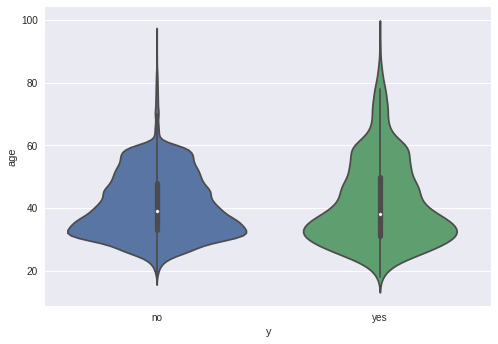

In [10]:
# 'age', 'balance', 'poutcome'
import seaborn as sns
import matplotlib.pyplot as plt

df_plot=data[['age', 'y']]

sns.violinplot(x='y',
            y='age',
           data=df_plot)
plt.show()

#It appears that the age of subscribers is more skewed towards higher ages than non-subscribers. 
#The difference is very visibly notable above age 60; a much higher proportion of subscribers were of retirement 
# age than nonsubscribers.

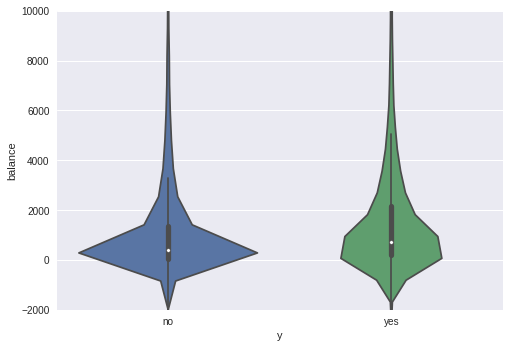

In [11]:
df_plot=data[['balance', 'y']]

sns.violinplot(x='y',
            y='balance',
           data=df_plot)
plt.ylim(-2000, 10000)
plt.show()

# Although it is more difficult to see in this plot due to the massive variance in bank account balances,
# subscribers in general had a larger average bank account balance as opposed to non-subscribers. The distribution
# of balances for non-subscribers was also more skewed towards low numbers.

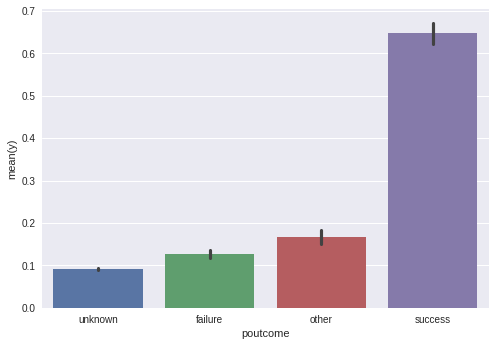

In [12]:
df_plot = pd.DataFrame()
df_plot['poutcome'] = data['poutcome']
df_plot['y'] = y

ax = sns.barplot(x='poutcome', y='y', data=df_plot)
plt.show()

# As you would expect, a previous marketing campaign being successful was a huge predictor in whether
# the current one would be successful as well.

# MODELING
- Identify how you would control for overfitting in each classification technique.
- Evaluate the performance of each model. Be robust in your analysis.
- In each model, identify the most important predictive variables and explain how you identified them.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# most common categorical responses to set as defaults for linear models
defaults = ['job_blue-collar', 'marital_married', 'education_secondary', 
            'contact_cellular', 'month_may', 'poutcome_unknown']

#combine df_bin and df_num for prediction, split into train/test
df_all = pd.concat( [ df_bin.drop( defaults, axis=1), df_num ], axis=1)
features = df_all.columns.values
df_all_train, df_all_test, y_train, y_test = train_test_split(df_all, y, test_size=.1)

#gridsearch to find best parameters
params = {'penalty': ['l1', 'l2'],
         'C': [.01, .1, 1, 10]
         }
log_grid = GridSearchCV(LogisticRegression(), param_grid=params).fit( df_all_train, y_train)
log_model = log_grid.best_estimator_

In this logit model I used grid search cross validation to find the best tuning parameters. The cross validation ensured that the best parameters were chosen without overfitting to any one training set. I also used Sklearn's
logistic regression function rather than statsmodels. Sklearn automatically implements regularization which 
also serves to reduce overfitting<br>

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#log model evaluation
cval_scores = cross_val_score(log_model, df_all_train, y_train)
y_pred = log_model.predict( df_all_test)

print 'Accuracy Score: ' + str( accuracy_score(y_pred, y_test))
print 'Standard Deviation: ' + str(cval_scores.std())
print 'Baseline Score: ' + str( 1 - float(sum(y_test)) / len(y_test))

Accuracy Score: 0.894957983193
Standard Deviation: 0.000440358838498
Baseline Score: 0.871074745688


Although it may not seem like a large difference, the accuracy of my model was significantly higher than the baseline accuracy, which is what could be achieved by predicting that every person would not subscribe. The difference between the accuracy of my model on the test set and thase baseline accuracy was about 6 standard deviations, meaning there was <.001% chance of this occuring by chance

In [15]:
# zip coefficients and feature names into tuples so they can be sorted
feat_coefs = zip( features, log_model.coef_[0])
feat_coefs = sorted(feat_coefs, key=lambda x: x[1], reverse=True)
feat_coefs

[('poutcome_success', 2.3835343404666069),
 ('month_mar', 1.978281233134221),
 ('month_oct', 1.2383312734257366),
 ('month_sep', 1.1210354760696863),
 ('duration', 1.0828393533249638),
 ('month_dec', 0.97360566777367796),
 ('month_jun', 0.87647262560839889),
 ('job_student', 0.68340264580414645),
 ('job_retired', 0.52226036060098036),
 ('month_apr', 0.3580130151464313),
 ('poutcome_other', 0.31357986405306082),
 ('marital_single', 0.28594970877277537),
 ('job_admin.', 0.27301655296479371),
 ('month_feb', 0.19797655952058438),
 ('marital_divorced', 0.18787443779836513),
 ('education_tertiary', 0.17891613330210743),
 ('job_management', 0.13610129403815455),
 ('poutcome_failure', 0.11471540265475362),
 ('job_technician', 0.11301375839727044),
 ('day', 0.088750654430204814),
 ('job_services', 0.068865163558506567),
 ('education_unknown', 0.068352545632238734),
 ('balance', 0.03605807436354018),
 ('previous', 0.024006751650258909),
 ('job_unemployed', 0.010816161442950903),
 ('age', 0.00239

The most important predictor of whether the campaign was 'poutcome', with previous success being very highly predictive of current success. The 'month' and 'job' variables also turned out to be important predictors for this model. I judged which predictors were most important by the absolute value of the coefficient. Positive values were positively correlated with the odds of success, while negative coefficients were negatively correlated. Odds are measured in comparison to default values I chose above.

In [16]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [2,5,10, None],
         'max_features': [5,10,20, None]
         }
rforest_grid = GridSearchCV( RandomForestClassifier(), param_grid=params, n_jobs=-1)
rforest_grid.fit( df_all_train, y_train)
print rforest_grid.best_params_
rforest = rforest_grid.best_estimator_

{'max_features': 20, 'max_depth': 10}


Again, I used gridsearch cross-validation to control for overfitting when selecting the best parameters. I also used gridsearch to adjust the max_depth and max_features which also served to limit overfitting when fitting the random forest to my training data. 

In [17]:
y_pred = rforest.predict( df_all_test)
cval_scores = cross_val_score(rforest, df_all_train, y_train)
print 'Accuracy Score: ' + str( accuracy_score(y_pred, y_test))
print 'Standard Deviation: ' + str( cval_scores.std())
print 'Baseline Score: ' + str( 1 - float(sum(y_test)) / len(y_test))

Accuracy Score: 0.89871738169
Standard Deviation: 0.000406025934767
Baseline Score: 0.871074745688


The random forest model performed significantly better than the logit model. The difference in accuracy again seems small, but when compared to the standard deviation of the cross_validated scores, it is still evident that this increase in accuracy was due to the predictive power of the model rather than just random chance.

In [18]:
rfeat_coefs = zip( features, rforest.feature_importances_)
rfeat_coefs = sorted(rfeat_coefs, key=lambda x: x[1], reverse=True)
rfeat_coefs

[('duration', 0.40858177894608055),
 ('poutcome_success', 0.14913690850983224),
 ('pdays', 0.060839472078178095),
 ('age', 0.058761411776582603),
 ('balance', 0.039272701173900408),
 ('day', 0.037267907056398014),
 ('month_mar', 0.030605270316462839),
 ('contact_unknown', 0.024512620216147113),
 ('housing', 0.021998385402678643),
 ('month_jun', 0.017680576212221265),
 ('month_oct', 0.015786716080010369),
 ('month_apr', 0.015225635591304298),
 ('campaign', 0.015113526156627779),
 ('previous', 0.012955083181694643),
 ('poutcome_other', 0.0085405181918177288),
 ('job_student', 0.0057566039783675162),
 ('marital_single', 0.0057273484211865424),
 ('poutcome_failure', 0.0055804283284879757),
 ('education_tertiary', 0.0046975354431507748),
 ('month_sep', 0.0046057467634097503),
 ('month_aug', 0.0044430603489632814),
 ('month_nov', 0.0040170166538036406),
 ('job_management', 0.0039460310926329005),
 ('education_primary', 0.0038802604485934722),
 ('job_technician', 0.003492580804657116),
 ('mon

The most important predictors for the random forest model were 'duration', 'poutcome', 'pdays', 'balance', and 'age'. I identified this by examining the feature_importances attribute of my random forest model which corresponds to the number of times each feature was used for splitting observations into groups with higher purity.

# EXPLANATION

- To Technical Audiences
    - Explain the limitations of your analysis and identify possible further steps you could take.
- To Non-Technical Audiences
    - Write a short summary of your analysis, explaining how your model works and how it performs.
    - Briefly explain the factors that contributed to identifying subscription versus non-subscription.

# Technical
As with almost any data analysis project, one of the main limiting factors was the data that was available to me. I would have liked to have a list of all previous contacts along with the exact day they occurred on. It could also potentially be helpful to have more accurate job descriptions other than the few categories provided. 
With more time, I could increase the accuracy of my model by engineering more features and accounting for interaction terms between variables. I would also like to combine the 'month' and 'day' variables into a single ordinal time variable. If I also had the year of last contact, I could do a proper temporal analysis and determine if there is an optimal frequency/time at which to contact potential subscribers. I would also like to see if a stratified.

# Non-technical
I fit two separate classification models to my data, a logit model and random forest model. The random forest model was the best of the two. The random forest model was able to predict whether somebody would subscribe with 90.3% accuracy, which was significantly better than guessing. My model identified 'duration', 'balance', 'age', nd 'poutcome' as the most important predictors for whether somebody would subscribe. The random forest in general works great for making predictions. Unfortunately, this type of model can't tell you how much of an effect each of these variables had. <br>
The logit model determines how big of an effect each of your features has on the likelihood of an individual subscribing. This model determined that the single largest predictor of somebody subscribing was a previous marketing campaign being successful. If a previous marketing campaign worked on somebody, they were about 10 times as likely to subscribe due to the current one. Also, the older somebody was and the more money they kept in the bank on average, the more likely they were to subscribe. The duration of last contact was also a great predictor of whether somebody would subscribe. The longer they were willing to stay on the phone, the more likely they were to subscribe, which seems pretty intuitive.

# PART 2

In [ ]:
#STUDENT SAMPLE 1
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

You imported cross_val_score twice. Also, you can combine imports from the same package into 1 line, e.g. <br>
from sklearn.cross_validation import cross_val_score, train_test_split <br><br>
You stored your data in variable 'd', while it was referenced as 'data' when you were splitting it into x1 and x2. These need to be consistent <br>
Try using more descriptive variables names so you can keep track of them more easily in larger projects. I prefer to call the original unmodified dataframe 'data'. In Scikit-learn, 'y' is convention for your target variable, and 'X' is convention for your predictors <br><br>
In cross_val_score, the parameter 'cv' must be an integer 2 or greater. Cross validation requires at least 2 folds so it can choose separate testing and training sets. <br><br>
You may also want to print out the standard deviation of the scores with scores.std(). This will give you an idea of how likely your mean score is to be reflective of your actual model performance.

In [ ]:
#STUDENT SAMPLE 2
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print( scores.mean())

Very clean code, and well done. You may also want to print out the standard deviation of the scores with scores.std(). This will give you an idea of how likely your mean score is to be reflective of your actual model performance. <br><br>